## Final Project Submission

Please fill out:
* Student name: Brian Bentson
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Functions

In [303]:
#import relevant modules
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import matplotlib.ticker as tick
plt.style.use('grayscale')

In [5]:
pd.set_option('display.max_rows', 100)

### Function to Explore Table and Column Info

In [6]:
def get_info(table_name, column=None):
    if column == None:
        print(f'Table Name: {table_name}') 
        print('\n')
        print('Table Columns')
        print(tables[table_name].columns)
        print('\n')
        print('Table Info')
        print(tables[table_name].info())
        print('\n')
        print('Table Descriptive Statistics')
        print(tables[table_name].describe())
    else:
        print(f'Table Name: {table_name}') 
        print('\n')
        print('Table Columns')
        print(tables[table_name].columns)
        print('\n')
        print('Table Info')
        print(tables[table_name].info())
        print('\n')
        print(f'{column.title()} Descriptive Statistics')
        print(tables[table_name][column].describe())
        print('\n')
        print('Table Values')
        print(tables[table_name][column].value_counts(dropna=False))
        print('\n')
        print('Unique Values')
        print(tables[table_name][column].unique())

### Function to Update Tick Labels

Sourced from: https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

In [7]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format


# Business Statement

Based on the suceess of their peers, Microsoft has decided to create a new movie studio focused on creating original video content. They have no direct movie creation experience and want to leverage historical movie data in order to determine what are leading indicators of a successful movie.

# Analysis Methodology

I will be analyzing historic movie data to find actionable insights for the head of Mircrosoft's new movie studio on how to create a successful introduction to the movie industry.

A movie's success can be judged by many factors centered around financial and social measures. Since it is imperative to start on a good footing when entering a new industry, I have decided to focus my analysis on the financial aspect of measuring success. This will mean that a successful historic movie will have a high relative return on investment. 

# Data Collection

Since I am choosing to judge movie success on the financial metric of return on investment (ROI), I need to gather the correct data in order to make that calculation. The following data will be gathered:
- Movie-specific meta-data
- Production Cost
- Global Revenue
<br>


I have 11 separate files which provide movie meta-data which will be helpful in the analysis. I will import them using pandas.

## Import Movie Data into Pandas

### Import Modules

In [8]:
#import relevant modules
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preview All Files

In [9]:
files = glob.glob(f'../dsc-phase-1-project/zippedData/*.[c,t]sv*')

tables = {}
dashes = '---'*25
    
for file in files:
    if 'csv' in file:
        table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
        tables[table_name] = pd.read_csv(file)
        print(dashes)
        print(f'Table Name: {table_name}')
        display(tables[table_name].head())
    else:    
        table_name = file.replace('.tsv.gz','').split('/')[-1].replace('.','_')
        tables[table_name] = pd.read_csv(file, delimiter='\t', encoding='latin-1')
        print(dashes)
        print(f'Table Name: {table_name}')
        display(tables[table_name].head())

rt_reviews = tables['rt_reviews']
rt_movie_info = tables['rt_movie_info']
tmdb_movies = tables['tmdb_movies']
tn_movie_budgets = tables['tn_movie_budgets']
imdb_title_basics = tables['imdb_title_basics']
imdb_title_ratings = tables['imdb_title_ratings']
imdb_name_basics = tables['imdb_name_basics']
imdb_title_principals = tables ['imdb_title_principals']
imdb_title_crew = tables['imdb_title_crew']
imdb_title_akas = tables['imdb_title_akas']
bom_movie_gross = tables['bom_movie_gross']

---------------------------------------------------------------------------
Table Name: imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


---------------------------------------------------------------------------
Table Name: tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


---------------------------------------------------------------------------
Table Name: imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


---------------------------------------------------------------------------
Table Name: imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


---------------------------------------------------------------------------
Table Name: imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


---------------------------------------------------------------------------
Table Name: rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


---------------------------------------------------------------------------
Table Name: imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


---------------------------------------------------------------------------
Table Name: rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


---------------------------------------------------------------------------
Table Name: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


---------------------------------------------------------------------------
Table Name: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


---------------------------------------------------------------------------
Table Name: imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


# Data Cleaning

## Understanding Raw Data

In order to determine if the right information is present and how to join different tables together for my analysis, I first need to understand what each piece of data is and how it can be used. I will do some short data exploration to understand the data better and decide which data processing techniques to use. 

### Column Meanings for Each Table

**imdb_title_crew**
- **tconst**: Unique identifier for each movie (PRIMARY KEY)
- **directors**: Director code
- **writers**: Writer code

<br>**tmdb_movies**
- Unnamed: 0: Can be removed or set as index
- genre_id's: Genre code
- id: Unknown
- original_language: movie language
- original_title: movie title
- popularity: Unknown
- release_date: movie release date
- title: movie title
- vote_average: Unknown
- vote_count: Number of votes

<br>**imdb_title_akas**
- title_id: movie id
- ordering: Unknown
- title: movie title
- region: Country of origin
- language: movie language
- types: Unknown
- attributes: Unknown
- is_original_title: Unknown

<br>**imdb_title_ratings**
- tconst: Unknown
- **averagerating**: movie rating
- **numvotes**: Number of votes

<br>**imdb_name_basics**
- **nconst**: Unique identifier (PRIMARY KEY)
- **primary_name**: Name
- birth_year: Year born
- death_year: Year died
- **primary_profession**: Job Roles
- known_for_titles: title id's

<br>**rt_reviews**
- id: Unknown
- review: Review comments
- rating: Movie rating
- fresh: fresh or rotten score
- critic: Critic Name
- top_critic: Unknown
- publisher: Publisher Name
- date: Unknown

<br> **imdb_title_basics**
- tconst: Unknown
- primary_title: English Movie Name
- original_title: Native Movie Name
- start_year: Unknown
- runtime_minutes: Movie length in minutes
- genres: movie genre

<br>**rt_movie_info**
- id: Unknown
- synopsis: Movie synopsis
- **rating**: movie parental rating
- **genre**: Movie genre
- **director**: Movie director
- **writer**: Movie writer
- **theater_date**: Theater release data
- dvd_date: DVD release date
- currency: Currency type
- box_office: Unknown
- **run_time**: Movie length
- studio: Movie Production Studio

<br>**tn_movie_budgets**
- id: Unknown
- release_date: Movie release date
- movie: Movie title
- **production_budget**: Movie production budget in USD
- **domestic_gross**: Gross revenue domestically
- **worldwide_gross**: Gross revenue worldwide

<br>**bom_movie_gross**
- title: Movie title
- studio: Movie studio
- **domestic_gross**: Gross revenue domestically
- **foreign_gross**: Gross revenue worldwide
- year: Release year

<br>**imdb_title_principals**
- tconst: Unknown
- ordering: Unknown
- nconst: Unknown
- category: Job role
- job: Unknown
- characters:Unknown

### Entity Relationship Diagram (UPDATE)

![](movie_project_erd.png)

## Clean Up Tables for Joins

### tn_movie_budgets

In [10]:
#number of rows, columns and first 5 rows
display(tn_movie_budgets.shape,tn_movie_budgets.head())

(5782, 6)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Remove Columns

In [11]:
#removing id because it doesn't like up with any other id's in other tables
tn_movie_budgets = tn_movie_budgets.drop('id',axis=1)
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Convert Values

In [12]:
#converting release_date to datetime object to be able to extract the year for future joins
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['start_year'] = tn_movie_budgets['release_date'].dt.year
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [13]:
#convert financial fields into integers for future calculations
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$','').str.replace(',','').astype('int')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$','').str.replace(',','').astype('int')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int')
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


#### Check for Duplicates

In [14]:
#check for any duplicates for the combination of movie and release_date because
#those are going to the be the primary keys for future joins
tn_movie_budgets.loc[tn_movie_budgets.duplicated(subset=['movie','start_year'], keep=False)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
3455,2009-06-05,Home,12000000,0,0,2009
5459,2009-04-23,Home,500000,15433,44793168,2009


1 duplicate found. Both will be removed during innner join with imdb_title_basics because they are prior to 2010.

#### Final Table View

In [15]:
tn_movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0,2018
5778,1999-04-02,Following,6000,48482,240495,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,2015-09-29,A Plague So Pleasant,1400,0,0,2015


### imdb_title_basics

In [16]:
#number of rows, columns and first 5 rows
display(imdb_title_basics.shape,imdb_title_basics.head())

(146144, 6)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Remove Columns

In [17]:
#remove original_title because primary_title looks to be most accurate
imdb_title_basics = imdb_title_basics.drop('original_title',axis=1)
imdb_title_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


#### Check for Duplicates

In [18]:
#check for any duplicates for the combination of primary_title and start_year
imdb_title_basics.loc[imdb_title_basics.duplicated(subset=['primary_title','start_year'], keep=False)]

,tconst,primary_title,start_year,runtime_minutes,genres
21,tt0250404,Godfather,2012,NaN,"Crime,Drama"
117,tt0443465,Before We Go,2014,95.0,"Comedy,Drama,Romance"
133,tt0452664,Party Crashers,2012,88.0,Comedy
211,tt0490075,Aftermath,2013,84.0,"Crime,Thriller"
276,tt0800054,The Guardians,2010,88.0,"Comedy,Family"
...,...,...,...,...,...
145919,tt9886934,The Projectionist,2019,81.0,Documentary
145937,tt9889072,The Promise,2017,NaN,Drama
146068,tt9905256,The Cross,2012,NaN,Thriller
146119,tt9913594,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"


Because there are almost 4000 duplicates, I will use the imdb_title_akas table to remove duplicates by ensuring imdb_title_basics holds only original titles

#### Final Table View

In [19]:
imdb_title_basics

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


### imdb_title_akas

In [20]:
#number of rows, columns and first 5 rows
display(imdb_title_akas.shape,imdb_title_akas.head())

(331703, 8)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


#### Remove Columns

In [21]:
#remove unnecessary columns for future joins
imdb_title_akas = imdb_title_akas.drop(['ordering','language','types','attributes','region'],axis=1)
imdb_title_akas.head()

,title_id,title,is_original_title
0,tt0369610,Джурасик свят,0.0
1,tt0369610,Jurashikku warudo,0.0
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,O Mundo dos Dinossauros,0.0
4,tt0369610,Jurassic World,0.0


#### Check for Duplicates

In [22]:
#check for duplicates in title id
imdb_title_akas.loc[imdb_title_akas.duplicated(subset=['title_id'], keep=False)]

,title_id,title,is_original_title
0,tt0369610,Джурасик свят,0.0
1,tt0369610,Jurashikku warudo,0.0
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,O Mundo dos Dinossauros,0.0
4,tt0369610,Jurassic World,0.0
...,...,...,...
331698,tt9827784,Sayonara kuchibiru,1.0
331699,tt9827784,Farewell Song,0.0
331700,tt9880178,La atención,1.0
331701,tt9880178,La atención,0.0


In [23]:
imdb_title_akas.loc[imdb_title_akas['title_id'] == 'tt0369610']

,title_id,title,is_original_title
0,tt0369610,Джурасик свят,0.0
1,tt0369610,Jurashikku warudo,0.0
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,O Mundo dos Dinossauros,0.0
4,tt0369610,Jurassic World,0.0
5,tt0369610,Jurassic World,0.0
6,tt0369610,Jurassic World,0.0
7,tt0369610,Jurski svijet,0.0
8,tt0369610,Olam ha'Yura,0.0
9,tt0369610,Jurassic World: Mundo Jurásico,0.0


Many duplicates found. Removing all rows where the is_original_title is 0.0

In [24]:
#only keep rows where is_original_title equal 1 
imdb_title_akas = imdb_title_akas.loc[imdb_title_akas['is_original_title'] == 1]
imdb_title_akas

,title_id,title,is_original_title
38,tt0369610,Jurassic World,1.0
80,tt0401729,John Carter,1.0
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,1.0
86,tt10027708,Miguelito - Canto a Borinquen,1.0
90,tt10050722,Thing I Don't Get,1.0
...,...,...,...
331690,tt9723084,Anderswo. Allein in Afrika,1.0
331692,tt9726638,Monkey King: The Volcano,1.0
331696,tt9755806,Big Shark,1.0
331698,tt9827784,Sayonara kuchibiru,1.0


In [25]:
#recheck for duplicates
imdb_title_akas.loc[imdb_title_akas.duplicated(subset=['title_id'], keep=False)]

,title_id,title,is_original_title
19255,tt1226736,Against the Wind,1.0
19256,tt1226736,Alexander Jamieson,1.0
23989,tt2392386,The Sugar Wars: The Life Story of Angelo Lonardo,1.0
23990,tt2392386,Sugar Wars - The Rise of the Cleveland Mafia,1.0
33369,tt1754830,Being Us,1.0
33372,tt1754830,Us,1.0
37514,tt2445698,Entre Nós,1.0
37517,tt2445698,A Pele do Cordeiro,1.0
42571,tt2219210,Crawl Bitch Crawl,1.0
42574,tt2219210,Crawl or Die,1.0


In [26]:
#example check
imdb_title_akas.loc[imdb_title_akas['title_id'] == 'tt2219210']

,title_id,title,is_original_title
42571,tt2219210,Crawl Bitch Crawl,1.0
42574,tt2219210,Crawl or Die,1.0


Still have a small number of duplicates. Will remove these rows now

In [27]:
#remove duplicates for rows with duplicate title_id
imdb_title_akas.drop_duplicates(subset=['title_id'], inplace=True)
imdb_title_akas

,title_id,title,is_original_title
38,tt0369610,Jurassic World,1.0
80,tt0401729,John Carter,1.0
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,1.0
86,tt10027708,Miguelito - Canto a Borinquen,1.0
90,tt10050722,Thing I Don't Get,1.0
...,...,...,...
331690,tt9723084,Anderswo. Allein in Afrika,1.0
331692,tt9726638,Monkey King: The Volcano,1.0
331696,tt9755806,Big Shark,1.0
331698,tt9827784,Sayonara kuchibiru,1.0


In [28]:
#recheck for duplicates
imdb_title_akas.loc[imdb_title_akas.duplicated(subset=['title_id'], keep=False)]

,title_id,title,is_original_title


No more duplicate title_id's

#### Final Table View

In [29]:
imdb_title_akas

,title_id,title,is_original_title
38,tt0369610,Jurassic World,1.0
80,tt0401729,John Carter,1.0
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,1.0
86,tt10027708,Miguelito - Canto a Borinquen,1.0
90,tt10050722,Thing I Don't Get,1.0
...,...,...,...
331690,tt9723084,Anderswo. Allein in Afrika,1.0
331692,tt9726638,Monkey King: The Volcano,1.0
331696,tt9755806,Big Shark,1.0
331698,tt9827784,Sayonara kuchibiru,1.0


## Joining Tables

I will be joining the tables in the following order:
- imdb_title_basics
- imdb_title_akas
- tn_movie_budgets
- imdb_title_ratings
- imdb_title_principals
- imdb_title_crew
- imdb_name_basics (TBD)

### Join imdb_title_basics and imdb_title_akas

I am starting with this join because there are many duplicate primary_titles in the imdb_title_basics table. I will use the is_original_title field to filter down the titles before joining to imdb_title_basics. This will ensure that when I join with tn_movie_budgets that I am not applying financials to the wrong movies with identical names.

I will be joining these tables on:
- imdb_title_basics: tconst
- imdb_title_akas: title_id

In [30]:
#review the shape of the dataframes prior to join
display(imdb_title_basics.shape, imdb_title_akas.shape)

(146144, 5)

(44653, 3)

#### Join the tables

In [31]:
movies_df = imdb_title_basics.merge(imdb_title_akas,how='inner',left_on=['tconst'], right_on=['title_id'])
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,Sunghursh,1.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",tt0066787,Ashad Ka Ek Din,1.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,tt0069049,The Other Side of the Wind,1.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,Sabse Bada Sukh,1.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,La Telenovela Errante,1.0
...,...,...,...,...,...,...,...,...
44648,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,Padmavyuhathile Abhimanyu,1.0
44649,tt9913248,Nepal - Homebird,2019,52.0,Documentary,tt9913248,Nepal - Homebird,1.0
44650,tt9914254,A Cherry Tale,2019,85.0,Documentary,tt9914254,Kirsebæreventyret,1.0
44651,tt9915436,Vida em Movimento,2019,70.0,Documentary,tt9915436,Vida em Movimento,1.0


#### Check for Duplicates

In [32]:
#check for duplicates in the primary_title field
movies_df.loc[movies_df.duplicated(subset=(['tconst']))]

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title


#### Remove Duplicates

In [33]:
#delete some of the duplicates after manually reviewing
movies_df.drop([32,1226,1500,1501,2238,3340,5070,6278,6877,7433,7572,10150,
                12026,12792,14022,14049,14252,14402,14788,15646,16145,16855,
               17003,17384,17890,17905,18396,18611,19072,19073,19864,20462,
               21259,21870,22843,24549,26617,26634,27813,31341,31564,34063,
               35258,37100,38852,41980,43111], inplace=True)

In [34]:
#recheck for duplicates
movies_df.loc[movies_df.duplicated(subset=(['tconst']))]

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title


No more duplicates

#### Final Table View

In [35]:
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,Sunghursh,1.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",tt0066787,Ashad Ka Ek Din,1.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,tt0069049,The Other Side of the Wind,1.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,Sabse Bada Sukh,1.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,La Telenovela Errante,1.0
...,...,...,...,...,...,...,...,...
44648,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,Padmavyuhathile Abhimanyu,1.0
44649,tt9913248,Nepal - Homebird,2019,52.0,Documentary,tt9913248,Nepal - Homebird,1.0
44650,tt9914254,A Cherry Tale,2019,85.0,Documentary,tt9914254,Kirsebæreventyret,1.0
44651,tt9915436,Vida em Movimento,2019,70.0,Documentary,tt9915436,Vida em Movimento,1.0


### Join movies_df and tn_movie_budgets

I will be joining these tables on:
- movies_df: [primary_title, start_year]
- tn_movie_budgets: [movie, start_year]

In [36]:
#review the shape of the dataframes prior to join
display(movies_df.shape, tn_movie_budgets.shape)

(44606, 8)

(5782, 6)

#### Join The Tables

In [37]:
#join tables together
movies_df = movies_df.merge(tn_movie_budgets, how='inner', 
                left_on=['primary_title','start_year'], 
                right_on=['movie','start_year'])
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,1.0,2012-12-31,Foodfight!,45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,tt8155288,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495
1445,tt8266310,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,1.0,2019-08-14,Blinded by the Light,15000000,0,0
1446,tt8364368,Crawl,2019,NaN,"Action,Horror,Thriller",tt8364368,Crawl,1.0,2019-07-12,Crawl,17000000,0,0
1447,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715


#### Check for Duplicates

In [38]:
#check for duplicates
movies_df.loc[movies_df.duplicated(subset=['primary_title', 'start_year'],
                                   keep=False)]

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
156,tt1085492,The Prince,2014,93.0,"Action,Thriller",tt1085492,The Prince,1.0,2014-08-22,The Prince,18000000,0,0
157,tt3918106,The Prince,2014,71.0,NaN,tt3918106,Ksiaze,1.0,2014-08-22,The Prince,18000000,0,0
158,tt4161288,The Prince,2014,92.0,Drama,tt4161288,Shah-zadeh,1.0,2014-08-22,The Prince,18000000,0,0
220,tt1216492,Leap Year,2010,100.0,"Comedy,Romance",tt1216492,Leap Year,1.0,2010-01-08,Leap Year,19000000,25918920,32618920
221,tt1537401,Leap Year,2010,94.0,"Drama,Romance",tt1537401,Año bisiesto,1.0,2010-01-08,Leap Year,19000000,25918920,32618920
313,tt1327709,Cyrus,2010,87.0,"Crime,Horror,Mystery",tt1327709,Cyrus,1.0,2010-06-18,Cyrus,7000000,7468936,10062896
314,tt1336617,Cyrus,2010,91.0,"Comedy,Drama,Romance",tt1336617,Cyrus,1.0,2010-06-18,Cyrus,7000000,7468936,10062896
474,tt1554091,A Better Life,2011,98.0,"Drama,Romance",tt1554091,A Better Life,1.0,2011-06-24,A Better Life,10000000,1759252,1884251
475,tt2027265,A Better Life,2011,110.0,Drama,tt2027265,Une vie meilleure,1.0,2011-06-24,A Better Life,10000000,1759252,1884251
611,tt1693107,Highway,2012,77.0,Comedy,tt1693107,Hillbilly Highway,1.0,2012-12-31,Highway,2000000,0,0


In [39]:
#example check
movies_df.loc[movies_df['primary_title'] == 'The Prince']

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
156,tt1085492,The Prince,2014,93.0,"Action,Thriller",tt1085492,The Prince,1.0,2014-08-22,The Prince,18000000,0,0
157,tt3918106,The Prince,2014,71.0,NaN,tt3918106,Ksiaze,1.0,2014-08-22,The Prince,18000000,0,0
158,tt4161288,The Prince,2014,92.0,Drama,tt4161288,Shah-zadeh,1.0,2014-08-22,The Prince,18000000,0,0


#### Remove Duplicates

In [40]:
#remove 39 duplicates
movies_df.drop_duplicates(subset=['primary_title','start_year'],inplace=True)

In [41]:
#recheck the duplicates
movies_df.loc[movies_df.duplicated(subset=['primary_title', 'start_year'],
                                   keep=False)]

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross


No duplicates for primary_title and start_year as well as tconst

#### Final Table View

In [42]:
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,1.0,2012-12-31,Foodfight!,45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,tt8155288,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495
1445,tt8266310,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,1.0,2019-08-14,Blinded by the Light,15000000,0,0
1446,tt8364368,Crawl,2019,NaN,"Action,Horror,Thriller",tt8364368,Crawl,1.0,2019-07-12,Crawl,17000000,0,0
1447,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715


### Join movies_df and imdb_title_ratings

I will be joining these tables on:
- movies_df: [tconst]
- imdb_title_ratings: [tconst]

In [43]:
#review the shape of the dataframes prior to join
display(movies_df.shape, imdb_title_ratings.shape)

(1428, 13)

(73856, 3)

#### Join the Tables

In [44]:
#join tables together
movies_df = movies_df.merge(imdb_title_ratings, how='inner', on='tconst')
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,1.0,2012-12-31,Foodfight!,45000000,0,73706,1.9,8248
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,tt8043306,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",tt8043306,Teefa in Trouble,1.0,2018-07-20,Teefa in Trouble,1500000,0,98806,7.4,2724
1414,tt8155288,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,6.3,27462
1415,tt8266310,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,1.0,2019-08-14,Blinded by the Light,15000000,0,0,6.2,173
1416,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,6.7,11628


#### Final Table View

In [45]:
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,1.0,2012-12-31,Foodfight!,45000000,0,73706,1.9,8248
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,tt8043306,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",tt8043306,Teefa in Trouble,1.0,2018-07-20,Teefa in Trouble,1500000,0,98806,7.4,2724
1414,tt8155288,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,6.3,27462
1415,tt8266310,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,1.0,2019-08-14,Blinded by the Light,15000000,0,0,6.2,173
1416,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,6.7,11628


### Join movies_df and bom_movies_gross

I will be joining these tables on:
- movies_df: [movie,start_year]
- bom_movies_gross: [title,year]

In [46]:
#join tables
movies_df = movies_df.merge(bom_movie_gross, how='inner', left_on=['movie','start_year'], right_on=['title','year'])
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title_x,is_original_title,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,averagerating,numvotes,title_y,studio,domestic_gross_y,foreign_gross,year
0,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
1,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
2,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
3,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787,The Rum Diary,FD,13100000.0,10800000,2011
4,tt0383010,The Three Stooges,2012,92.0,"Comedy,Family",tt0383010,The Three Stooges,1.0,2012-04-13,The Three Stooges,30000000,44338224,54052249,5.1,28570,The Three Stooges,Fox,44300000.0,10500000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,tt7388562,"Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",tt7388562,"Paul, Apostle of Christ",1.0,2018-03-23,"Paul, Apostle of Christ",5000000,17547999,25529498,6.7,5662,"Paul, Apostle of Christ",Affirm,17600000.0,5500000,2018
1019,tt7401588,Instant Family,2018,118.0,"Comedy,Drama",tt7401588,Instant Family,1.0,2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Instant Family,Par.,67400000.0,53200000,2018
1020,tt7535780,The Great Wall,2017,72.0,Documentary,tt7535780,The Great Wall,1.0,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,The Great Wall,Uni.,45500000.0,289400000,2017
1021,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",tt7784604,Hereditary,1.0,2018-06-08,Hereditary,10000000,44069456,70133905,7.3,151571,Hereditary,A24,44100000.0,35300000,2018


### Join movies_df and imdb_title_principals (not proceeding yet)

I will be joining these tables on:
- movies_df: [tconst]
- imdb_title_principals: [tconst]

In [47]:
#review the shape of the dataframes prior to join
display(movies_df.shape, imdb_title_principals.shape)

(1023, 20)

(1028186, 6)

**Question: How do I deal with the expansion of rows when trying to bring in directors and writers?**

## Post-Join Clean-Up of movies_df

It is now time to clean up the joined dataset in order to minimize noise in the data. This will include looking for:
<br>
- deleting columns
- deleting rows
- duplicates
- nulls 
- changing data types

In [48]:
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title_x,is_original_title,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,averagerating,numvotes,title_y,studio,domestic_gross_y,foreign_gross,year
0,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
1,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
2,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
3,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787,The Rum Diary,FD,13100000.0,10800000,2011
4,tt0383010,The Three Stooges,2012,92.0,"Comedy,Family",tt0383010,The Three Stooges,1.0,2012-04-13,The Three Stooges,30000000,44338224,54052249,5.1,28570,The Three Stooges,Fox,44300000.0,10500000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,tt7388562,"Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",tt7388562,"Paul, Apostle of Christ",1.0,2018-03-23,"Paul, Apostle of Christ",5000000,17547999,25529498,6.7,5662,"Paul, Apostle of Christ",Affirm,17600000.0,5500000,2018
1019,tt7401588,Instant Family,2018,118.0,"Comedy,Drama",tt7401588,Instant Family,1.0,2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Instant Family,Par.,67400000.0,53200000,2018
1020,tt7535780,The Great Wall,2017,72.0,Documentary,tt7535780,The Great Wall,1.0,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,The Great Wall,Uni.,45500000.0,289400000,2017
1021,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",tt7784604,Hereditary,1.0,2018-06-08,Hereditary,10000000,44069456,70133905,7.3,151571,Hereditary,A24,44100000.0,35300000,2018


### Deleting Rows

I want to look at the statistics around production budget to ensure that the dataset is not dominated by movies from indie studios. In order to determine which studios are considered the "top studios", I will join the tn_movie_budgets and bom_movie_gross tables and find the studios which have had at least one film in the top 50% of production budget.

I will be joining these tables on:
- tn_movie_budgets: [movie,start_year]
- bom_movie_gross: [title,year]

In [49]:
#join the tables
prod_budget_df = tn_movie_budgets.merge(bom_movie_gross, how='inner', 
                                         left_on=['movie','start_year'], 
                                         right_on=['title','year'])
prod_budget_df

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,start_year,title,studio,domestic_gross_y,foreign_gross,year
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,2017-11-17,Justice League,300000000,229024295,655945209,2017,Justice League,WB,229000000.0,428900000,2017
4,2015-11-06,Spectre,300000000,200074175,879620923,2015,Spectre,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...
1210,2012-04-27,Sound of My Voice,135000,408015,429448,2012,Sound of My Voice,FoxS,408000.0,NaN,2012
1211,2012-06-15,Your Sister's Sister,120000,1597486,3090593,2012,Your Sister's Sister,IFC,1600000.0,NaN,2012
1212,2015-07-10,The Gallows,100000,22764410,41656474,2015,The Gallows,WB (NL),22800000.0,20200000,2015
1213,2017-07-07,A Ghost Story,100000,1594798,2769782,2017,A Ghost Story,A24,1600000.0,NaN,2017


In [50]:
#what are the studios in the top 50% of spend
top_studio_list = set(list(prod_budget_df.loc[prod_budget_df['production_budget'] 
                                              > prod_budget_df['production_budget'].
                                              quantile(q=0.5)]['studio']))

In [51]:
#number and names of unique top studios
print(len(top_studio_list))
list(top_studio_list)

40


['FD',
 'Sum.',
 'STX',
 'Sony',
 'P/DW',
 'ORF',
 'TriS',
 'RTWC',
 'Par.',
 'Focus',
 'MGM',
 'BV',
 'LGF',
 'MNE',
 'Studio 8',
 'BG',
 'Uni.',
 'LG/S',
 'Wein.',
 'Gold.',
 'Magn.',
 'Fox',
 'Rela.',
 'Annapurna',
 'BST',
 'RAtt.',
 'W/Dim.',
 'SPC',
 'WB (NL)',
 'FoxS',
 'WB',
 'SGem',
 'Free',
 'EOne',
 'NM',
 'ENTMP',
 'VE',
 'BSC',
 'CBS',
 'GrtIndia']

In [52]:
#filter movies_df to include only movies from top_studios_list
movies_df = movies_df.loc[movies_df['studio'].isin(top_studio_list)]
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title_x,is_original_title,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,averagerating,numvotes,title_y,studio,domestic_gross_y,foreign_gross,year
0,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
1,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
2,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
3,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787,The Rum Diary,FD,13100000.0,10800000,2011
4,tt0383010,The Three Stooges,2012,92.0,"Comedy,Family",tt0383010,The Three Stooges,1.0,2012-04-13,The Three Stooges,30000000,44338224,54052249,5.1,28570,The Three Stooges,Fox,44300000.0,10500000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,tt7334528,Uncle Drew,2018,103.0,"Comedy,Sport",tt7334528,Uncle Drew,1.0,2018-06-29,Uncle Drew,18000000,42469946,46527161,5.7,9739,Uncle Drew,LG/S,42500000.0,4200000,2018
1017,tt7349662,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",tt7349662,BlacKkKlansman,1.0,2018-08-10,BlacKkKlansman,15000000,49275340,93017335,7.5,149005,BlacKkKlansman,Focus,49300000.0,44000000,2018
1019,tt7401588,Instant Family,2018,118.0,"Comedy,Drama",tt7401588,Instant Family,1.0,2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Instant Family,Par.,67400000.0,53200000,2018
1020,tt7535780,The Great Wall,2017,72.0,Documentary,tt7535780,The Great Wall,1.0,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,The Great Wall,Uni.,45500000.0,289400000,2017


### Deleting Columns

In [53]:
#remove columns
movies_df = movies_df.drop(['title_x','is_original_title','title_y','domestic_gross_y','primary_title','title_id','is_original_title','foreign_gross'],axis=1)
movies_df

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,averagerating,numvotes,studio,year
0,tt0359950,2013,114.0,"Adventure,Comedy,Drama",2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013
1,tt0365907,2014,114.0,"Action,Crime,Drama",2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014
2,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338,Uni.,2015
3,tt0376136,2011,119.0,"Comedy,Drama",2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787,FD,2011
4,tt0383010,2012,92.0,"Comedy,Family",2012-04-13,The Three Stooges,30000000,44338224,54052249,5.1,28570,Fox,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,tt7334528,2018,103.0,"Comedy,Sport",2018-06-29,Uncle Drew,18000000,42469946,46527161,5.7,9739,LG/S,2018
1017,tt7349662,2018,135.0,"Biography,Crime,Drama",2018-08-10,BlacKkKlansman,15000000,49275340,93017335,7.5,149005,Focus,2018
1019,tt7401588,2018,118.0,"Comedy,Drama",2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Par.,2018
1020,tt7535780,2017,72.0,Documentary,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,Uni.,2017


In [54]:
#rename columns
movies_df = movies_df.rename(columns={'domestic_gross_x':'domestic_gross'})

QUESTION:Do higher ratings correlate with more revenue?
<br>
ANSWER: there is a weak positive correlation between average rating and domestic_gross

### Fixing Duplicates

In [55]:
#checking the number of duplicates in the dataframe
movies_df.duplicated().sum()

0

### Fixing Nulls

In [56]:
#checking the number of null values in each column
movies_df.isna().sum()

tconst               0
start_year           0
runtime_minutes      0
genres               0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
averagerating        0
numvotes             0
studio               0
year                 0
dtype: int64

In [57]:
#checking for zeros
movies_df.loc[(movies_df['domestic_gross'] == 0) & (movies_df['worldwide_gross'] == 0)].count()

tconst               0
start_year           0
runtime_minutes      0
genres               0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
averagerating        0
numvotes             0
studio               0
year                 0
dtype: int64

### Changing Data Types

In [58]:
#checking the current data types of all columns
display(movies_df.info(),movies_df.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             945 non-null    object        
 1   start_year         945 non-null    int64         
 2   runtime_minutes    945 non-null    float64       
 3   genres             945 non-null    object        
 4   release_date       945 non-null    datetime64[ns]
 5   movie              945 non-null    object        
 6   production_budget  945 non-null    int64         
 7   domestic_gross     945 non-null    int64         
 8   worldwide_gross    945 non-null    int64         
 9   averagerating      945 non-null    float64       
 10  numvotes           945 non-null    int64         
 11  studio             945 non-null    object        
 12  year               945 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usa

None

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year
0,tt0359950,2013,114.0,"Adventure,Comedy,Drama",2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013
1,tt0365907,2014,114.0,"Action,Crime,Drama",2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014


Data types are reasonable for the values

### Adding Release Month

Adding a column for the release month will allow me to see which months are most common to release a movie

In [59]:
movies_df['release_month'] = movies_df['release_date'].dt.month

### Final Table View

In [60]:
movies_df

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month
0,tt0359950,2013,114.0,"Adventure,Comedy,Drama",2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12
1,tt0365907,2014,114.0,"Action,Crime,Drama",2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014,9
2,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338,Uni.,2015,6
3,tt0376136,2011,119.0,"Comedy,Drama",2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787,FD,2011,10
4,tt0383010,2012,92.0,"Comedy,Family",2012-04-13,The Three Stooges,30000000,44338224,54052249,5.1,28570,Fox,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,tt7334528,2018,103.0,"Comedy,Sport",2018-06-29,Uncle Drew,18000000,42469946,46527161,5.7,9739,LG/S,2018,6
1017,tt7349662,2018,135.0,"Biography,Crime,Drama",2018-08-10,BlacKkKlansman,15000000,49275340,93017335,7.5,149005,Focus,2018,8
1019,tt7401588,2018,118.0,"Comedy,Drama",2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Par.,2018,11
1020,tt7535780,2017,72.0,Documentary,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,Uni.,2017,2


## Calculations

### Calculating Return on Investment

Return on Investment is the quantitative metric I am using to determine which movies are historically successful. This metric takes into account how much was invested to make the film and how much more revenue was received versus that cost. Also, return on investment does not need to be inflation adjusted.
<br>
Return on Investment takes the amount of profit (worldwide_gross - production_budget) and divides it by the initial investment cost (production_budget). This metric will give a sense of which movies were successful relative to how much they spent instead of making it an absolute metric on total profit. Later I will analyze if you can spending more is effective in profiting more.

To calculate Return on Investment, I will use the following equation:
<br>
(worldwide_gross - production_budget) / (production_budget)
<br>
Why am i using worldwide_gross vs domestic_gross?

QUESTION: Should the movie be released domestically or globally? Is it worth releasing globally?

In [61]:
#calculate roi and place into a new column
movies_df['roi'] = (movies_df['worldwide_gross'] 
                    - movies_df['production_budget']) / movies_df['production_budget']

In [62]:
#check the new column
movies_df.sort_values('roi',ascending=False).head()

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi
694,tt2309260,2015,81.0,"Horror,Mystery,Thriller",2015-07-10,The Gallows,100000,22764410,41656474,4.2,17763,WB (NL),2015,7,415.564740
384,tt1560985,2012,83.0,Horror,2012-01-06,The Devil Inside,1000000,53262945,101759490,4.2,33522,Par.,2012,1,100.759490
372,tt1536044,2010,91.0,Horror,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,5.7,93122,Par.,2010,10,58.170677
960,tt5052448,2017,104.0,"Horror,Mystery,Thriller",2017-02-24,Get Out,5000000,176040665,255367951,7.7,400474,Uni.,2017,2,50.073590
605,tt1991245,2012,86.0,"Horror,Mystery,Thriller",2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,5.0,60304,WB,2012,5,41.411721


### Calculating Outliers

Outliers in ROI really skew the data as can be seen by the difference in a median of 1.19 and a mean of 2.8. This means outliers need to be taken out to have a realistic view of ROI. I will use the 1.5*IQR as the limit for outliers since median is more representative than the mean for this data set.

In [63]:
#calculate the IQR for ROI
roi_q25 = movies_df['roi'].quantile(q=0.25)
roi_q75 = movies_df['roi'].quantile(q=0.75)
roi_iqr = roi_q75 - roi_q25
roi_outlier_thresh = 1.5*roi_iqr
upper_thresh = roi_q75 + roi_outlier_thresh
lower_thresh = roi_q25 - roi_outlier_thresh

In [64]:
movies_df.loc[movies_df['roi'] > upper_thresh].sort_values('roi', ascending=False).head(20)

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi
694,tt2309260,2015,81.0,"Horror,Mystery,Thriller",2015-07-10,The Gallows,100000,22764410,41656474,4.2,17763,WB (NL),2015,7,415.564740
384,tt1560985,2012,83.0,Horror,2012-01-06,The Devil Inside,1000000,53262945,101759490,4.2,33522,Par.,2012,1,100.759490
372,tt1536044,2010,91.0,Horror,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,5.7,93122,Par.,2010,10,58.170677
960,tt5052448,2017,104.0,"Horror,Mystery,Thriller",2017-02-24,Get Out,5000000,176040665,255367951,7.7,400474,Uni.,2017,2,50.073590
605,tt1991245,2012,86.0,"Horror,Mystery,Thriller",2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,5.0,60304,WB,2012,5,41.411721
524,tt1778304,2011,83.0,"Horror,Mystery,Thriller",2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,5.8,85689,Par.,2011,10,40.407969
823,tt3322940,2014,99.0,"Horror,Mystery,Thriller",2014-10-03,Annabelle,6500000,84273813,256862920,5.4,122039,WB (NL),2014,10,38.517372
239,tt1320244,2010,87.0,"Drama,Horror,Thriller",2010-08-27,The Last Exorcism,1800000,41034350,70165900,5.6,45815,LGF,2010,8,37.981056
656,tt2184339,2013,85.0,"Horror,Thriller",2013-06-07,The Purge,3000000,64473115,91266581,5.7,183549,Uni.,2013,6,29.422194
945,tt4786282,2016,81.0,"Drama,Horror,Mystery",2016-07-22,Lights Out,5000000,67268835,148806510,6.3,100650,WB (NL),2016,7,28.761302


Question: Does how much you spend influence how successful a movie will be?
<br> 
Answer: According to the correlation between production_budget and roi is negative, therefore, how much you spend on a movie is not a good indicator of success. 

### Calculating Success

I want to label each movie a success or failure based on ROI. A success would be any movie that 

# EDA and Visualization

I am going to explore the data and create specific visualizations based on questions I'd like to ask. 

In [65]:
#current state of the dataframe
movies_df

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi
0,tt0359950,2013,114.0,"Adventure,Comedy,Drama",2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12,1.064409
1,tt0365907,2014,114.0,"Action,Crime,Drama",2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014,9,1.218164
2,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338,Uni.,2015,6,6.669092
3,tt0376136,2011,119.0,"Comedy,Drama",2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787,FD,2011,10,-0.521228
4,tt0383010,2012,92.0,"Comedy,Family",2012-04-13,The Three Stooges,30000000,44338224,54052249,5.1,28570,Fox,2012,4,0.801742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,tt7334528,2018,103.0,"Comedy,Sport",2018-06-29,Uncle Drew,18000000,42469946,46527161,5.7,9739,LG/S,2018,6,1.584842
1017,tt7349662,2018,135.0,"Biography,Crime,Drama",2018-08-10,BlacKkKlansman,15000000,49275340,93017335,7.5,149005,Focus,2018,8,5.201156
1019,tt7401588,2018,118.0,"Comedy,Drama",2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Par.,2018,11,1.494504
1020,tt7535780,2017,72.0,Documentary,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,Uni.,2017,2,1.229912


## How has the movie industry grown over time?

I want to understand the overall landscape of the movie industry and how it has done both domestically and worldwide.

In [130]:
#create a dataframe specifically for this graph
financials_df = movies_df[['start_year','domestic_gross','worldwide_gross',
                  'production_budget']]
financials_by_year = financials_df.groupby(by='start_year')[['domestic_gross',
                                                             'worldwide_gross',
                                                             'production_budget']].mean()
financials_by_year.reset_index(inplace=True)

In [138]:
#view the dataframe
financials_by_year

,start_year,domestic_gross,worldwide_gross,production_budget
0,2010,6.297399e+07,1.427252e+08,5.058240e+07
1,2011,5.758976e+07,1.424199e+08,5.057118e+07
2,2012,7.092585e+07,1.787259e+08,5.560105e+07
3,2013,7.932322e+07,1.974203e+08,6.211574e+07
4,2014,7.659738e+07,1.953114e+08,5.378010e+07
5,2015,7.292466e+07,1.846366e+08,5.317925e+07
6,2016,8.035124e+07,1.947212e+08,5.710727e+07
7,2017,8.869387e+07,2.515364e+08,6.849872e+07
8,2018,9.691103e+07,2.442186e+08,6.007000e+07


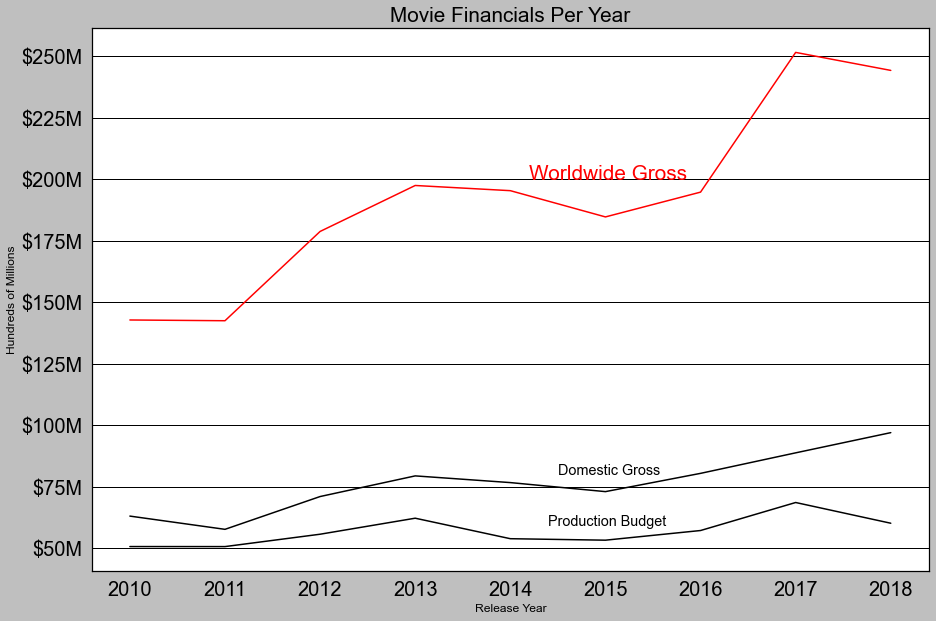

In [317]:
#create line graph of financials over time
fig, ax = plt.subplots(figsize=(15,10))
x = financials_by_year['start_year']
y1 = financials_by_year['domestic_gross']
y2 = financials_by_year['worldwide_gross']
y3 = financials_by_year['production_budget']

ax.plot(x,y1, label='Domestic Gross')
ax.plot(x,y2, label='Worldwide Gross', color='red')
ax.plot(x,y3, label='Production Budget', color='black')
ax.text(2014.4,59000000,'Production Budget', fontsize='large')
ax.text(2014.5,80000000,'Domestic Gross', fontsize='large')
ax.text(2014.2,200000000,'Worldwide Gross', color='red', fontsize='xx-large')
ax.set_title('Movie Financials Per Year', fontsize='xx-large')
ax.set_xlabel('Release Year')
ax.set_ylabel('Hundreds of Millions')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid(axis='x')
ax.tick_params(axis='both', which='major', labelsize=20)

**Analysis**
<br>
The graph shows that worldwide gross revenue has increased at a faster rate than domestic in the past 10 years. This informs us that a worldwide release is preferred over domestic only.

### Calculate percentage increase in worldwide revenue in last 10 years

In [70]:
(financials_by_year['worldwide_gross'][8] - 
financials_by_year['worldwide_gross'][0])/financials_by_year['worldwide_gross'][0]

0.7111104004494873

### Calculate percentage of movies that do not make their money back

#### For bom_movie_gross and tn_movie_budgets Joined (all movie studios)

In [71]:
#Join tn_movie_budgets and bom_movie_gross
percent_profitable_df = tn_movie_budgets.merge(bom_movie_gross, how='inner',
                                              left_on=['movie','start_year'],
                                              right_on=['title','year'])
percent_profitable_df

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,start_year,title,studio,domestic_gross_y,foreign_gross,year
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,2017-11-17,Justice League,300000000,229024295,655945209,2017,Justice League,WB,229000000.0,428900000,2017
4,2015-11-06,Spectre,300000000,200074175,879620923,2015,Spectre,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...
1210,2012-04-27,Sound of My Voice,135000,408015,429448,2012,Sound of My Voice,FoxS,408000.0,NaN,2012
1211,2012-06-15,Your Sister's Sister,120000,1597486,3090593,2012,Your Sister's Sister,IFC,1600000.0,NaN,2012
1212,2015-07-10,The Gallows,100000,22764410,41656474,2015,The Gallows,WB (NL),22800000.0,20200000,2015
1213,2017-07-07,A Ghost Story,100000,1594798,2769782,2017,A Ghost Story,A24,1600000.0,NaN,2017


In [72]:
#calculate roi
percent_profitable_df['roi'] = (percent_profitable_df['worldwide_gross'] 
                    - percent_profitable_df['production_budget'])/percent_profitable_df['production_budget']

In [73]:
#Calculate percentage of movies that do not make money
percent_profitable_df.loc[percent_profitable_df['roi'] <= 0]['roi'].count()/len(percent_profitable_df)*100

20.411522633744855

#### For Movies_df Dataset of Only Top Movie Studios (used in presentation)

In [74]:
#Calculate percentage of movies that do not make money
movies_df.loc[movies_df['roi'] <= 0]['roi'].count()/len(movies_df)*100

14.920634920634921

## Which genres produced the best ROI?

I want understand which genres produce the best ROI historically. 

**Adding Genre Columns**

Splitting the genres into columns will allow for the analysis of financial information by genre to see which genres are most successful.

In [75]:
#df.explode can be used to create multiple rows
movies_df_genres = movies_df
movies_df_genres['genres'] = movies_df_genres['genres'].map(lambda x: x.split(','))
movies_df_genres = movies_df.explode('genres')
movies_df_genres

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi
0,tt0359950,2013,114.0,Adventure,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12,1.064409
0,tt0359950,2013,114.0,Comedy,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12,1.064409
0,tt0359950,2013,114.0,Drama,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12,1.064409
1,tt0365907,2014,114.0,Action,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014,9,1.218164
1,tt0365907,2014,114.0,Crime,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014,9,1.218164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,tt7401588,2018,118.0,Drama,2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Par.,2018,11,1.494504
1020,tt7535780,2017,72.0,Documentary,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,Uni.,2017,2,1.229912
1022,tt7959026,2018,116.0,Crime,2018-12-14,The Mule,50000000,103804407,170857676,7.1,58955,WB,2018,12,2.417154
1022,tt7959026,2018,116.0,Drama,2018-12-14,The Mule,50000000,103804407,170857676,7.1,58955,WB,2018,12,2.417154


In [199]:
movies_df_genres.loc[movies_df_genres['genres'] == 'Horror']
movies_df_genres.to_csv('/Users/brian/Documents/Learning/Data Science/Flatiron Data Science Bootcamp/My Files/Phase 1/Phase 1 Project/dsc-phase-1-project/test.csv')

In [202]:
#create the necessary dataframe
roi_by_genres = movies_df_genres.groupby('genres').median()['roi'].sort_values(ascending=True)
roi_by_genres

genres
Western       -0.054538
Musical        0.646412
Sport          0.822305
Family         1.106108
Crime          1.218164
Fantasy        1.234364
War            1.240222
Drama          1.306136
Biography      1.318634
History        1.431779
Action         1.443181
Comedy         1.711576
Romance        1.748406
Adventure      1.779868
Music          1.955618
Sci-Fi         2.231891
Thriller       2.278181
Animation      2.292976
Documentary    2.312333
Mystery        3.508959
Horror         4.163727
Name: roi, dtype: float64

In [78]:
#ordering roi by genre from most to least
genre_roi_order = movies_df_genres.groupby('genres').median()['roi'].sort_values(ascending=False).index
genre_roi_order_list = list(genre_roi_order)
genre_roi_order_list.reverse()

In [214]:
movies_df_genres.groupby('genres').mean()

,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,year,release_month,roi,Success
genres,,,,,,,,,,,
Action,2013.829032,114.574194,9.292645e+07,1.074429e+08,2.942671e+08,6.489355,220259.935484,2013.829032,6.451613,1.968227,0.377419
Adventure,2013.955720,111.586716,1.138631e+08,1.376378e+08,3.887378e+08,6.521402,226706.693727,2013.955720,6.992620,2.348436,0.450185
Animation,2013.903614,94.879518,1.062952e+08,1.521684e+08,4.284828e+08,6.619277,142481.120482,2013.903614,7.289157,3.083919,0.542169
Biography,2014.562500,120.052083,2.992990e+07,4.828612e+07,9.848386e+07,7.072917,136748.364583,2014.562500,9.145833,2.730189,0.416667
Comedy,2013.537396,102.698061,4.814404e+07,7.400926e+07,1.703200e+08,6.308587,114830.678670,2013.537396,6.977839,2.646522,0.437673
Crime,2013.805369,112.510067,3.746221e+07,4.823871e+07,1.069479e+08,6.593960,148546.805369,2013.805369,7.046980,1.616049,0.302013
Documentary,2012.166667,91.166667,3.040000e+07,3.002571e+07,8.442013e+07,5.916667,27947.666667,2012.166667,6.333333,3.910516,0.500000
Drama,2013.661364,114.231818,3.350632e+07,4.442041e+07,9.722343e+07,6.727273,131824.215909,2013.661364,7.759091,2.766077,0.400000
Family,2012.906250,104.875000,7.107656e+07,7.483733e+07,1.809590e+08,6.059375,82472.140625,2012.906250,7.890625,1.760740,0.265625


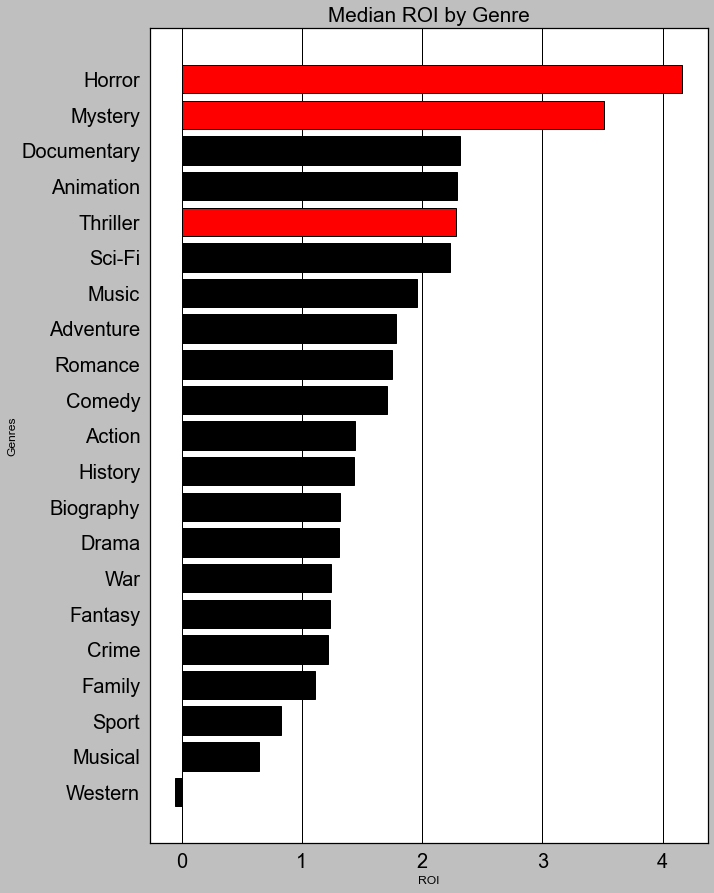

In [315]:
#create a barplot of median roi per genre
fig, ax = plt.subplots(figsize=(10,15))
y = genre_roi_order_list
width = roi_by_genres

ax.barh(y=y,width=width, color=['black','black','black','black','black',
                                'black','black','black','black','black','black',
                                'black','black','black','black','black','red',
                                'black','black','red','red'])
ax.set_title('Median ROI by Genre',fontsize='xx-large')
ax.set_xlabel('ROI')
ax.set_ylabel('Genres')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(axis='y')

**Analysis**
<br>
The graph shows that Horror has twice the ROI over the median of other genres. This is mostly due to their low cost per film. I recommend that Microsoft start off safe and pick a primary genre of Horror and secondary genres of Mystery and Thriller to create a storyline.

### Median Cost per Film Horror/Thriller/Mystery vs Others

I want to see what the median production cost is for a horror/mystery/thriller film vs other genres

In [249]:
horror_production_cost = movies_df_genres.loc[movies_df_genres['genres'].isin(['Horror','Thriller','Mystery'])]
horror_production_cost.groupby('movie').median()['production_budget'].median()

27250000.0

The median production cost of a Horror/Thriller/Mystery movie is $27,250,000

In [242]:
other_production_cost = movies_df_genres.loc[~movies_df_genres['genres'].isin(['Horror','Thriller','Mystery'])]
other_production_cost.groupby('movie').median()['production_budget'].median()

35000000.0

The median production cost of a non-Horror/Thriller/Mystery movie is $35,000,000

**Analysis**
<br>
Horror/Thriller/Mystery movies are about 28% cheaper to produce

## Which genres have the highest chance of success?

I will define success of a movie where the roi is greater than or equal to 2 which is that the film has returned 2 times more profit than the initial cost.

In [243]:
#create a new column based off roi which measures success or failure
movies_df_5_2 = movies_df_genres.loc[:,['genres','roi']]
movies_df_5_2['Success'] = np.where(movies_df_5_2['roi'] >= 2, True, False)
movies_df_5_2

,genres,roi,Success
0,Adventure,1.064409,False
0,Comedy,1.064409,False
0,Drama,1.064409,False
1,Action,1.218164,False
1,Crime,1.218164,False
...,...,...,...
1019,Drama,1.494504,False
1020,Documentary,1.229912,False
1022,Crime,2.417154,True
1022,Drama,2.417154,True


In [244]:
#create success dataframe and calculating percentage success for 
movies_df_5_2.loc[movies_df_5_2['Success'] == True]

,genres,roi,Success
2,Action,6.669092,True
2,Adventure,6.669092,True
2,Sci-Fi,6.669092,True
9,Horror,4.923219,True
9,Mystery,4.923219,True
...,...,...,...
1017,Crime,5.201156,True
1017,Drama,5.201156,True
1022,Crime,2.417154,True
1022,Drama,2.417154,True


In [245]:
#calculate percentage successful for Horror, Thriller and Mystery movies only
table_5_2 = pd.DataFrame(movies_df_5_2.groupby(by='genres').sum()['Success']/movies_df_5_2.groupby(by='genres').count()['Success']*100)
table_5_2 = table_5_2.sort_values('Success').reset_index()
table_5_2.loc[table_5_2['genres'].isin(['Horror','Thriller','Mystery'])]['Success'].mean()
#used both 0 and 2 as roi thresholds in cell above to get numbers in presentation

60.59648760005757

In [246]:
#calculating percentage successful for all other genres
table_5_2 = pd.DataFrame(movies_df_5_2.groupby(by='genres').sum()['Success']/movies_df_5_2.groupby(by='genres').count()['Success']*100)
table_5_2 = table_5_2.sort_values('Success').reset_index()
table_5_2.loc[~table_5_2['genres'].isin(['Horror','Thriller','Mystery'])]['Success'].mean()
#used both 0 and 2 as roi thresholds in cell above to get numbers in presentation

40.74711937639691

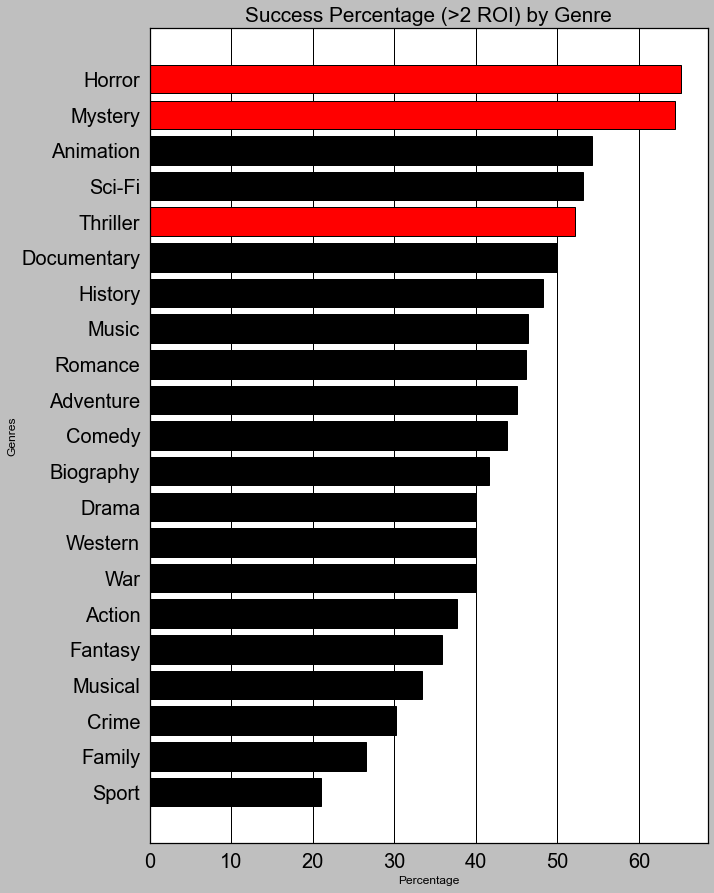

In [313]:
#create a barplot of percentage success per genre
fig, ax = plt.subplots(figsize=(10,15))
y = table_5_2['genres']
width = table_5_2['Success']

ax.barh(y=y,width=width, color=['black','black','black','black','black',
                                'black','black','black','black','black','black',
                                'black','black','black','black','black','red',
                                'black','black','red','red'])
ax.set_title('Success Percentage (>2 ROI) by Genre', fontsize='xx-large')
ax.set_xlabel('Percentage')
ax.set_ylabel('Genres')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(axis='y')

**Analysis**
<br>
Horror movies have a 61% chance of having a ROI of greater than or equal to 2. This is the highest chance of any genre with Mystery and Thriller being extremely high as well.

## Which month should a Horror movie be released?

I want to know what months are successful Horror movies released

In [83]:
movies_df_genres

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi,Success
0,tt0359950,2013,114.0,Adventure,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12,1.064409,False
0,tt0359950,2013,114.0,Comedy,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12,1.064409,False
0,tt0359950,2013,114.0,Drama,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,Fox,2013,12,1.064409,False
1,tt0365907,2014,114.0,Action,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014,9,1.218164,False
1,tt0365907,2014,114.0,Crime,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,Uni.,2014,9,1.218164,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,tt7401588,2018,118.0,Drama,2018-11-16,Instant Family,48000000,67363237,119736188,7.4,46728,Par.,2018,11,1.494504,False
1020,tt7535780,2017,72.0,Documentary,2017-02-17,The Great Wall,150000000,45157105,334486852,6.5,24,Uni.,2017,2,1.229912,False
1022,tt7959026,2018,116.0,Crime,2018-12-14,The Mule,50000000,103804407,170857676,7.1,58955,WB,2018,12,2.417154,True
1022,tt7959026,2018,116.0,Drama,2018-12-14,The Mule,50000000,103804407,170857676,7.1,58955,WB,2018,12,2.417154,True


In [358]:
#create a new dataframe with only horror movies which are successful
movies_df_horror = movies_df_genres.loc[(movies_df_genres['genres'] == 
                                         'Horror') & (movies_df_genres['Success'] == 
                                                      True)]
movies_df_horror

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi,Success
9,tt0431021,2012,92.0,Horror,2012-08-31,The Possession,14000000,49130588,82925064,5.9,53649,LGF,2012,8,4.923219,True
20,tt0464154,2010,88.0,Horror,2010-08-20,Piranha 3D,24000000,25003155,83660160,5.4,81327,W/Dim.,2010,8,2.485840,True
38,tt0498381,2017,102.0,Horror,2017-02-03,Rings,25000000,27793018,82917283,4.5,34151,Par.,2017,2,2.316691,True
154,tt1179933,2016,103.0,Horror,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,7.2,260383,Par.,2016,3,20.657284,True
166,tt1204977,2014,89.0,Horror,2014-10-24,Ouija,5000000,50856010,103300632,4.5,44054,Uni.,2014,10,19.660126,True
183,tt1220634,2010,96.0,Horror,2010-09-10,Resident Evil: Afterlife,57500000,60128566,295874190,5.9,153270,SGem,2010,9,4.145638,True
235,tt1314655,2010,80.0,Horror,2010-09-17,Devil,10000000,33679655,63354114,6.2,122080,Uni.,2010,9,5.335411,True
239,tt1320244,2010,87.0,Horror,2010-08-27,The Last Exorcism,1800000,41034350,70165900,5.6,45815,LGF,2010,8,37.981056,True
277,tt1389139,2016,107.0,Horror,2016-09-09,When the Bough Breaks,10000000,29747603,30768449,5.1,4729,SGem,2016,9,2.076845,True
283,tt1396484,2017,135.0,Horror,2017-09-08,It,35000000,327481748,697457969,7.4,359123,WB (NL),2017,9,18.927371,True


In [380]:
graph_release_month = movies_df_horror.groupby('release_month')['roi'].agg(movie_count='count', roi_median='median')


graph_release_month.reset_index(inplace=True)
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
              9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
graph_release_month.replace({'release_month':month_dict}, inplace=True)
graph_release_month

,release_month,movie_count,roi_median
0,Jan,8,10.611761
1,Feb,6,6.793661
2,Mar,4,6.929399
3,Apr,2,22.428512
4,May,1,41.411721
5,Jun,2,18.778922
6,Jul,6,13.146386
7,Aug,7,4.410423
8,Sep,10,3.522098
9,Oct,10,25.782825


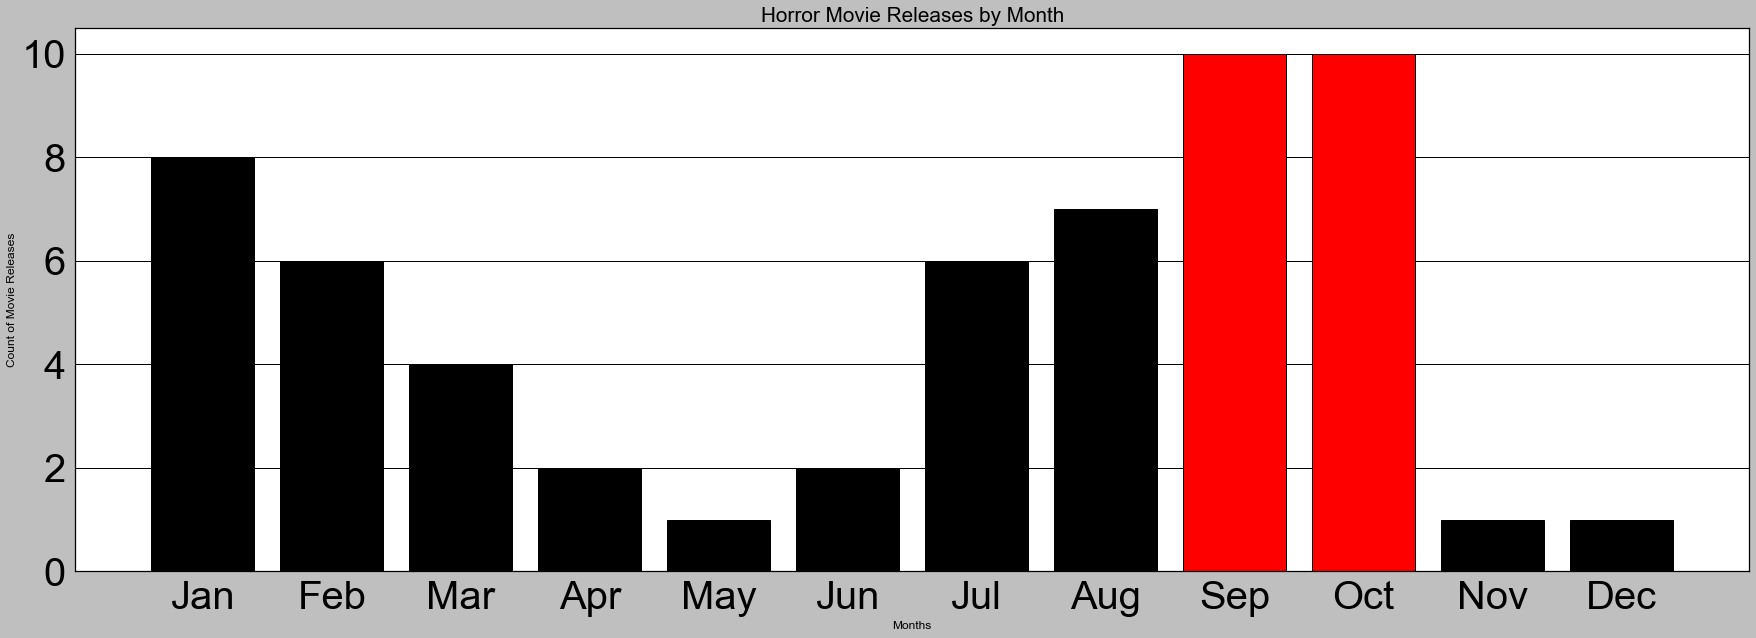

In [385]:
#create a barplot showing count of movie releases by month
fig, ax = plt.subplots(figsize=(30,10))
x=graph_release_month['release_month']
y=graph_release_month['movie_count']

ax.bar(x=x, height=y, color=['black', 'black','black', 'black','black', 'black',
                              'black', 'black','red', 'red','black', 'black'])

ax.set_title('Horror Movie Releases by Month', fontsize='xx-large')
ax.set_xlabel('Months')
ax.set_ylabel('Count of Movie Releases')
ax.tick_params(axis='both', which='major', labelsize=40)
ax.grid(axis='x')

**Analysis**
<br>
This graph shows that the most frequent month that a horror movie gets releases is in September and October.

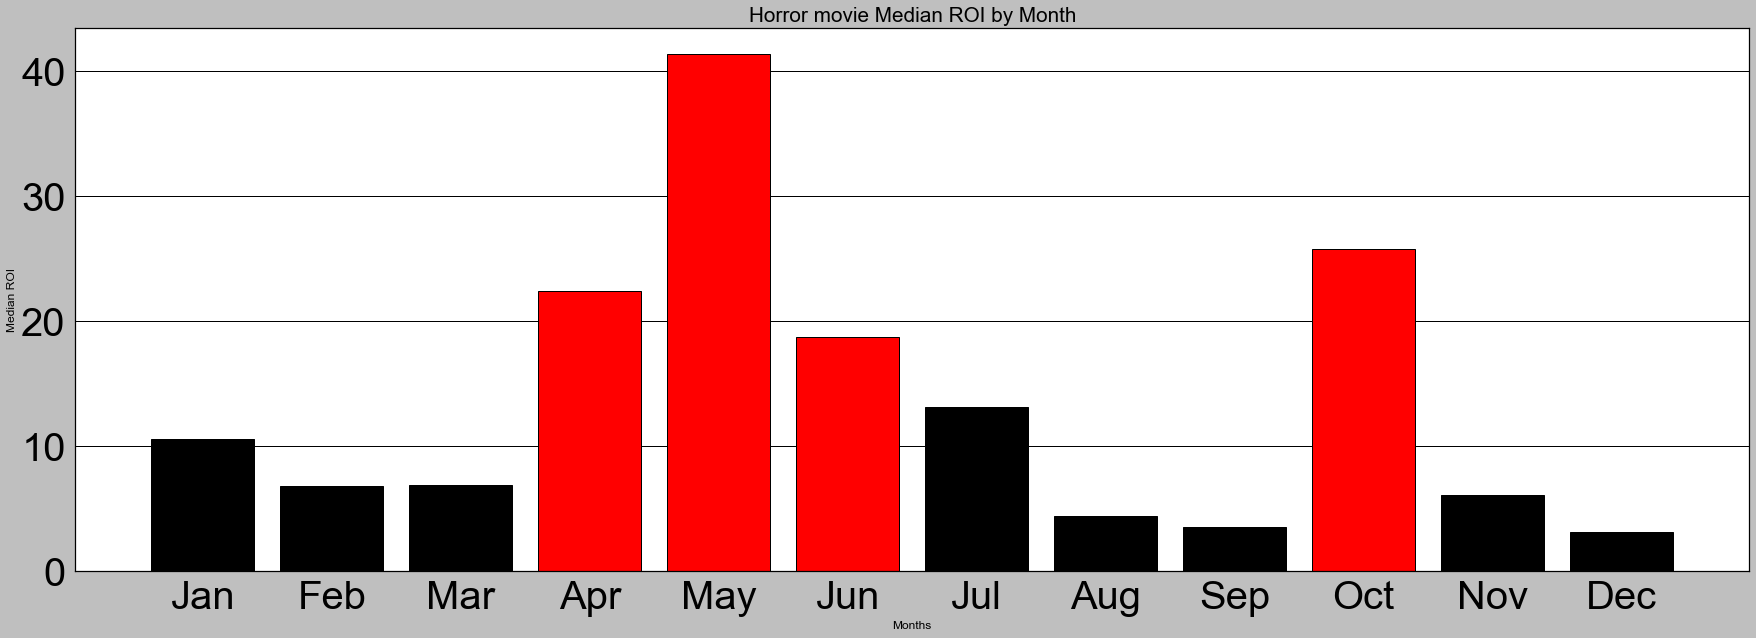

In [384]:
#create a barplot showing median roi of movie releases by month
fig, ax = plt.subplots(figsize=(30,10))
x=graph_release_month['release_month']
y=graph_release_month['roi_median']

ax.bar(x=x, height=y, color=['black', 'black','black', 'red','red', 'red',
                              'black', 'black','black', 'red','black', 'black'])

ax.set_title('Horror movie Median ROI by Month', fontsize='xx-large')
ax.set_xlabel('Months')
ax.set_ylabel('Median ROI')
ax.tick_params(axis='both', which='major', labelsize=40)
ax.grid(axis='x')

**Analysis**
<br>
This graph shows that the highest median ROI for a horror movie is in October. I believe releasing a movie in October would be ideal.

## How much should be spent on the movie to get the best ROI?

I want to understand how production budget relates to roi for a horror film

In [386]:
movies_df_horror

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi,Success
9,tt0431021,2012,92.0,Horror,2012-08-31,The Possession,14000000,49130588,82925064,5.9,53649,LGF,2012,8,4.923219,True
20,tt0464154,2010,88.0,Horror,2010-08-20,Piranha 3D,24000000,25003155,83660160,5.4,81327,W/Dim.,2010,8,2.485840,True
38,tt0498381,2017,102.0,Horror,2017-02-03,Rings,25000000,27793018,82917283,4.5,34151,Par.,2017,2,2.316691,True
154,tt1179933,2016,103.0,Horror,2016-03-11,10 Cloverfield Lane,5000000,72082999,108286422,7.2,260383,Par.,2016,3,20.657284,True
166,tt1204977,2014,89.0,Horror,2014-10-24,Ouija,5000000,50856010,103300632,4.5,44054,Uni.,2014,10,19.660126,True
183,tt1220634,2010,96.0,Horror,2010-09-10,Resident Evil: Afterlife,57500000,60128566,295874190,5.9,153270,SGem,2010,9,4.145638,True
235,tt1314655,2010,80.0,Horror,2010-09-17,Devil,10000000,33679655,63354114,6.2,122080,Uni.,2010,9,5.335411,True
239,tt1320244,2010,87.0,Horror,2010-08-27,The Last Exorcism,1800000,41034350,70165900,5.6,45815,LGF,2010,8,37.981056,True
277,tt1389139,2016,107.0,Horror,2016-09-09,When the Bough Breaks,10000000,29747603,30768449,5.1,4729,SGem,2016,9,2.076845,True
283,tt1396484,2017,135.0,Horror,2017-09-08,It,35000000,327481748,697457969,7.4,359123,WB (NL),2017,9,18.927371,True


In [387]:
roi_vs_production_budget = movies_df_horror[['production_budget','roi']]
roi_vs_production_budget

,production_budget,roi
9,14000000,4.923219
20,24000000,2.485840
38,25000000,2.316691
154,5000000,20.657284
166,5000000,19.660126
183,57500000,4.145638
235,10000000,5.335411
239,1800000,37.981056
277,10000000,2.076845
283,35000000,18.927371


In [397]:
#create a list of conditions to bucket production_budget
conditions = [(roi_vs_production_budget['production_budget'] >0) 
               & (roi_vs_production_budget['production_budget'] <= 5000000),
              (roi_vs_production_budget['production_budget'] > 5000000) 
               & (roi_vs_production_budget['production_budget'] <= 10000000),
              (roi_vs_production_budget['production_budget'] > 10000000) 
               & (roi_vs_production_budget['production_budget'] <= 25000000),
              (roi_vs_production_budget['production_budget'] > 25000000)]

values = ['0-5M','5-10M','10-25M','25M+']

roi_vs_production_budget['cat'] = np.select(conditions,values)
roi_vs_production_budget

<ipython-input-397-d4bea2013e2e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_vs_production_budget['cat'] = np.select(conditions,values)


,production_budget,roi,cat
9,14000000,4.923219,10-25M
20,24000000,2.485840,10-25M
38,25000000,2.316691,10-25M
154,5000000,20.657284,0-5M
166,5000000,19.660126,0-5M
183,57500000,4.145638,25M+
235,10000000,5.335411,5-10M
239,1800000,37.981056,0-5M
277,10000000,2.076845,5-10M
283,35000000,18.927371,25M+


In [398]:
#creating dataframe to graph roi by quartile production budget
graph_roi_vs_prod_budget = roi_vs_production_budget.groupby('cat').median()
graph_roi_vs_prod_budget

,production_budget,roi
cat,,
0-5M,4000000,26.179241
10-25M,15000000,7.597060
25M+,40000000,2.875279
5-10M,10000000,5.335411


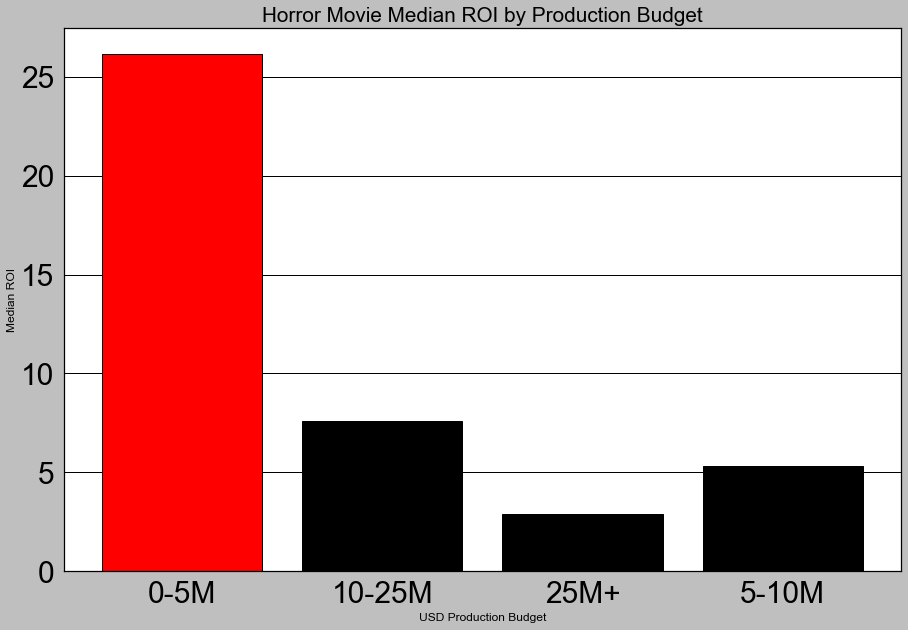

In [403]:
#create a barplot showing the median roi by production_budget quartile
fig, ax = plt.subplots(figsize=(15,10))
x=graph_roi_vs_prod_budget.index
y=graph_roi_vs_prod_budget['roi']

ax.bar(x=x, height=y, color=['red','black','black','black'])

ax.set_title('Horror Movie Median ROI by Production Budget', fontsize='xx-large')
ax.set_xlabel('USD Production Budget')
ax.set_ylabel('Median ROI')
ax.tick_params(axis='both', which='major', labelsize=30)
ax.grid(axis='x')

**Analysis**
<br>
This graph shows that ROI drops drastically the more you spend. Spending less than 5 million dollars will ensure a very high ROI. However, spending between 5 million and 10 million dollars will get you a outstanding ROI of 4.3.

### Getting movie names and studios for examples of success.

In [404]:
movies_df_horror.sort_values('roi', ascending=False)

,tconst,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,studio,year,release_month,roi,Success
694,tt2309260,2015,81.0,Horror,2015-07-10,The Gallows,100000,22764410,41656474,4.2,17763,WB (NL),2015,7,415.564740,True
384,tt1560985,2012,83.0,Horror,2012-01-06,The Devil Inside,1000000,53262945,101759490,4.2,33522,Par.,2012,1,100.759490,True
372,tt1536044,2010,91.0,Horror,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,5.7,93122,Par.,2010,10,58.170677,True
960,tt5052448,2017,104.0,Horror,2017-02-24,Get Out,5000000,176040665,255367951,7.7,400474,Uni.,2017,2,50.073590,True
605,tt1991245,2012,86.0,Horror,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,5.0,60304,WB,2012,5,41.411721,True
524,tt1778304,2011,83.0,Horror,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,5.8,85689,Par.,2011,10,40.407969,True
823,tt3322940,2014,99.0,Horror,2014-10-03,Annabelle,6500000,84273813,256862920,5.4,122039,WB (NL),2014,10,38.517372,True
239,tt1320244,2010,87.0,Horror,2010-08-27,The Last Exorcism,1800000,41034350,70165900,5.6,45815,LGF,2010,8,37.981056,True
656,tt2184339,2013,85.0,Horror,2013-06-07,The Purge,3000000,64473115,91266581,5.7,183549,Uni.,2013,6,29.422194,True
945,tt4786282,2016,81.0,Horror,2016-07-22,Lights Out,5000000,67268835,148806510,6.3,100650,WB (NL),2016,7,28.761302,True


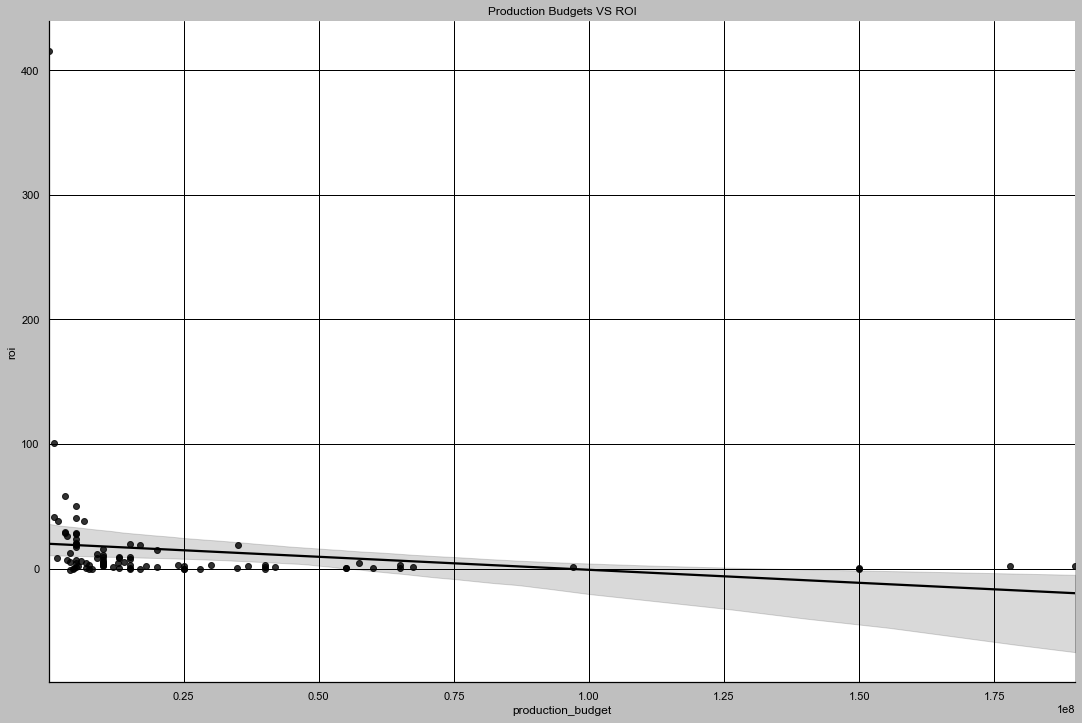

In [333]:
#create a lmplot showing the correlation between production budget and roi
sns.lmplot(x='production_budget', y='roi', data=roi_vs_production_budget, height=10, aspect=1.5).set(title='Production Budgets VS ROI')


## What director should be considered?

In [ ]:
#sns.barplot 

In [ ]:
#func formatter for millions on plots

In [ ]:
#ipywidgets import interact for dropdown of styles

df['genres'].map(lambda x : x.split(',')) gets list of genres then you can use .explode function to create rows

<AxesSubplot:>

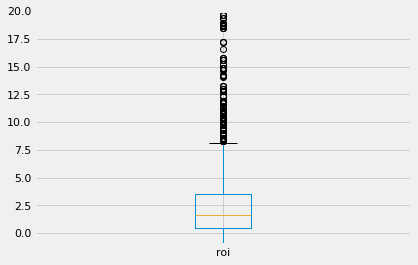

In [535]:
movies_df['roi'].plot(kind='box', ylim=(-1,20))

## How successful are movies based off video games?

## How does horror ratings/popularity compare to other genres?

# Appendix

Things I explored but aren't part of recommendations

## Percentage of Movies

INTERESTING FACT: 36% of movies do not make any profit when using all data in tn_movie_budgets and 28% when using the tn_movie_budgets when joined with other tables

## Assumptions Made

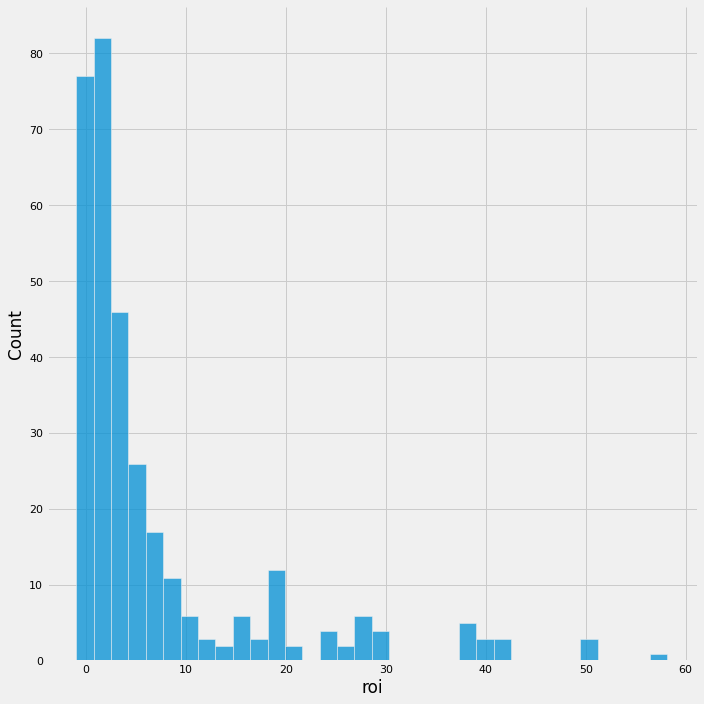

In [671]:
#distribution of Horror movies
horror_movies = movies_df_genres.loc[movies_df_genres['genres'].isin(['Horror','Thriller','Mystery'])]
horror_movies = horror_movies.loc[horror_movies['roi'] < 100]
horror_movies.count()
sns.displot(horror_movies['roi'],height=10)